Imports and Load Datasets

In [532]:
#Preprocessing/Analysis
import pandas as pd
import matplotlib.pyplot as plt
FILE_PATH = "EuCitiesTemperatures.csv"
df =  pd.read_csv(FILE_PATH)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,NaN,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,NaN,27.57,5.28
8,Orsha,Belarus,9.48,no,no,NaN,NaN,4.93
9,Pinsk,Belarus,9.48,no,no,NaN,NaN,6.42


Preprocessing/Analysis(Part 1)

In [533]:
#Filling in missing values
df['latitude'] = df.groupby('country')['latitude'].transform(lambda value: value.fillna(value.mean())).round(2)
df['longitude'] = df.groupby('country')['longitude'].transform(lambda value: value.fillna(value.mean())).round(2)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


In [534]:
#(2) Maximal number of cities
subset = df[df['latitude'].between(40,68,inclusive=True) & df['longitude'].between(15,30,inclusive=True)]
max_city = subset.groupby('country').count()['city'].sort_values(ascending=False).to_frame('City Count')

# Coutries that have maximum cities 
max_city[max_city['City Count'] == max_city.iloc[0, 0]]

/var/folders/b1/nvd1svxs7118kl2pzvjs4b_40000gn/T/ipykernel_59643/538122648.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  subset = df[df['latitude'].between(40,68,inclusive=True) & df['longitude'].between(15,30,inclusive=True)]


,City Count
country,
Romania,9
Poland,9


In [535]:
#(3)Missing temp values
df['temperature'] = df.groupby(['EU','coastline'])['temperature'].transform(lambda val: val.fillna(val.mean())).round(2)
df.head(10)

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


Imports

In [536]:
import matplotlib.pyplot as plt


Visualization(Part 2)

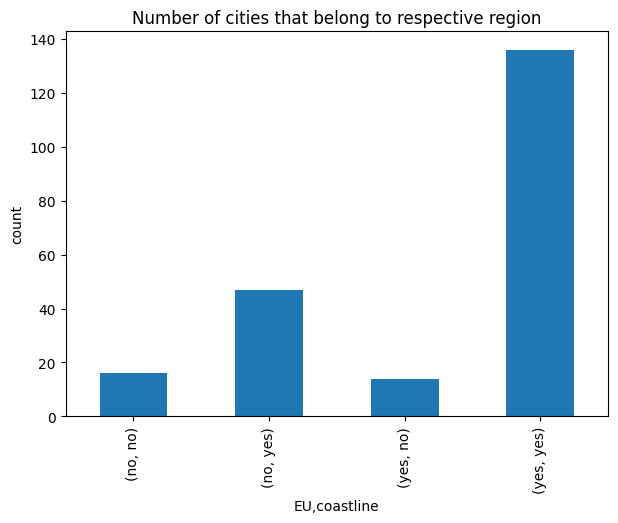

In [537]:
#(1)
region = df.groupby(['EU','coastline']).count()['city'].to_frame('City Count')
plt.figure(figsize=(7, 5))
plt.title('Number of cities that belong to respective region')
plt.ylabel('count')
region['City Count'].plot(kind='bar')
plt.show()

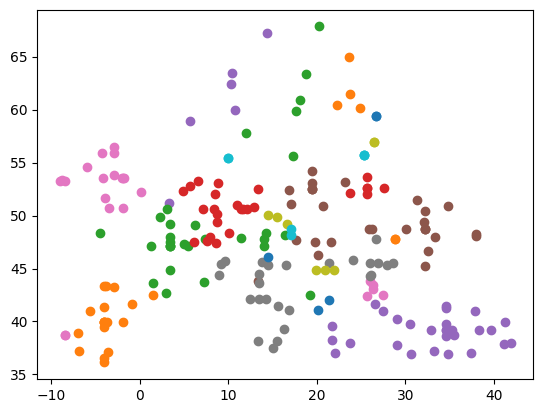

In [538]:
#(2)
groups = df.groupby('country')
for name, group in groups:
    plt.scatter(group['longitude'], group['latitude'])


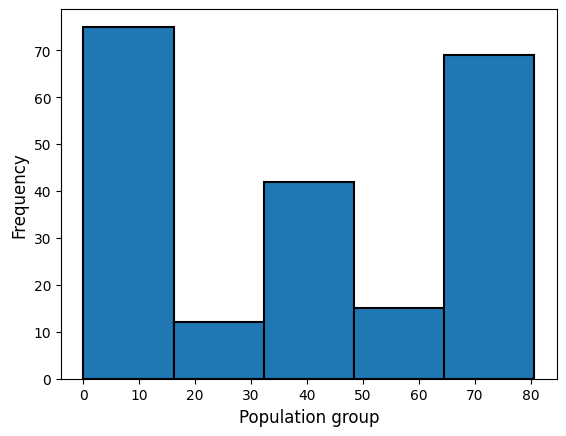

In [539]:
#(3)
plt.xlabel('Population group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.hist(df['population'], linewidth=1.5, edgecolor='black', bins=5)
plt.show()

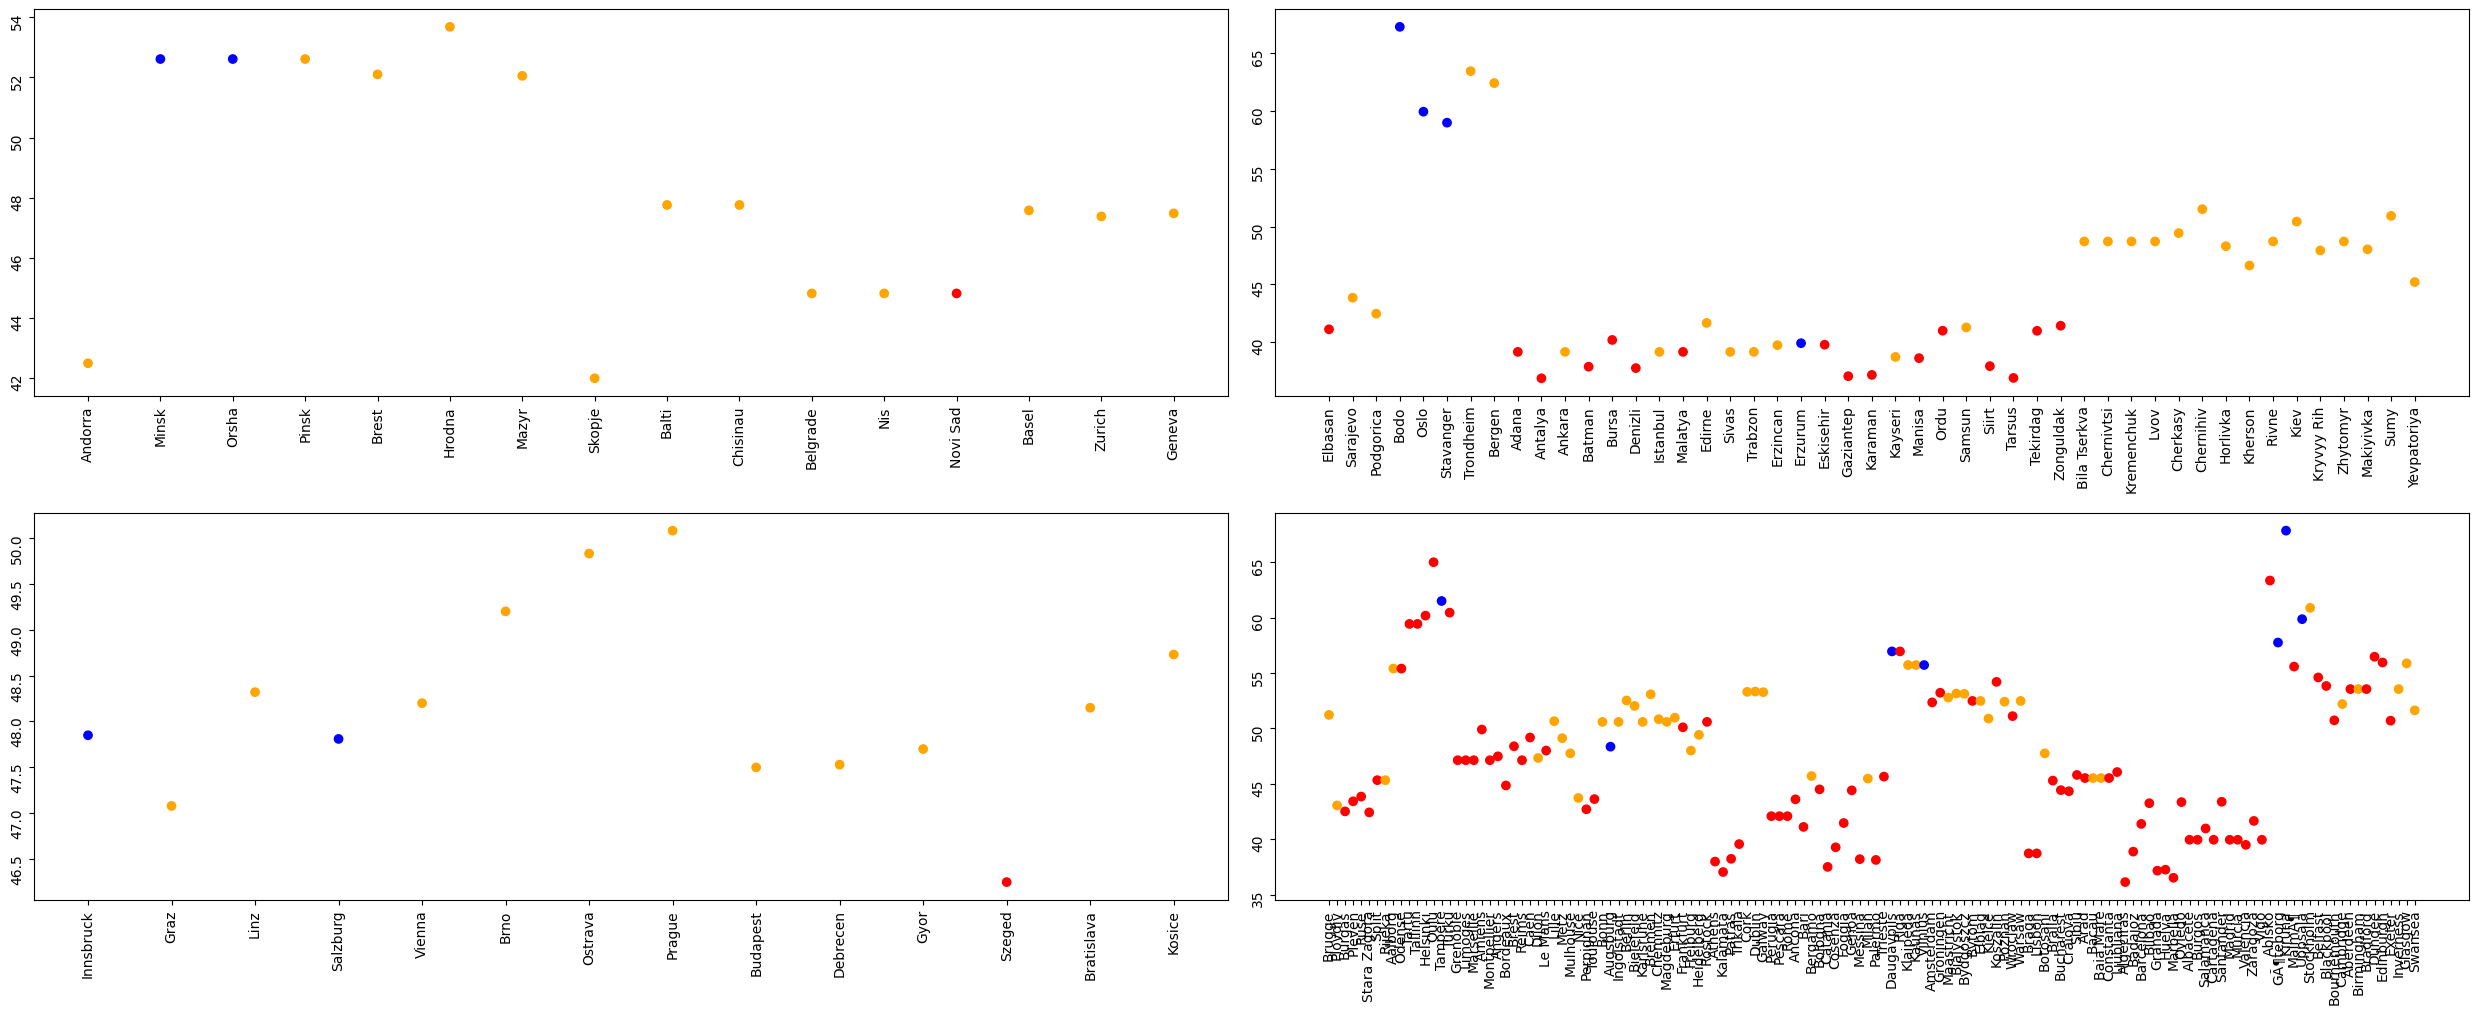

In [541]:
#4
data_set = df.groupby(['EU','coastline'])
[]
groups = list(data_set.groups.keys())
fig, axes = plt.subplots(2, 2,figsize = (25,10))
plt.sca(axes[0, 0])
plt.xticks(list(range(0,len(data_set.get_group(groups[0])))))
axes[0,0].scatter(x = data_set.get_group(groups[0])['city'], y = data_set.get_group(groups[0])['latitude'],color = [('red' if x > 10 else ('orange' if ((x <= 10) & (x>=6)) else 'blue')) for x in (data_set.get_group(groups[0])['temperature'])])
axes[0,0].tick_params(labelrotation=90)

plt.sca(axes[0, 1])
plt.xticks(list(range(0,len(data_set.get_group(groups[1])))))
axes[0,1].scatter(x = data_set.get_group(groups[1])['city'], y = data_set.get_group(groups[1])['latitude'],color = [('red' if x > 10 else ('orange' if ((x <= 10) & (x>=6)) else 'blue')) for x in (data_set.get_group(groups[1])['temperature'])])
axes[0,1].tick_params(labelrotation=90)

plt.sca(axes[1, 0])
plt.xticks(list(range(0,len(data_set.get_group(groups[2])))))
axes[1,0].scatter(x = data_set.get_group(groups[2])['city'], y = data_set.get_group(groups[2])['latitude'],color = [('red' if x > 10 else ('orange' if ((x <= 10) & (x>=6)) else 'blue')) for x in (data_set.get_group(groups[2])['temperature'])])
axes[1,0].tick_params(labelrotation=90)

plt.sca(axes[1, 1])
plt.tight_layout()
plt.xticks(list(range(0,len(data_set.get_group(groups[3])))))
axes[1,1].scatter(x = data_set.get_group(groups[3])['city'], y = data_set.get_group(groups[3])['latitude'],color = [('red' if x > 10 else ('orange' if ((x <= 10) & (x>=6)) else 'blue')) for x in (data_set.get_group(groups[3])['temperature'])])
axes[1,1].tick_params(labelrotation=90)
